In [5]:
import numpy as np
import math
import random as rd
import matplotlib.pyplot as plt
import timeit
import time
from tempfile import TemporaryFile

#plotting avg r vs K for M oscillators in time t and steps dt using complex phase for n runs



def step(x):
    return 0.5*(np.sign(x+0.5)+np.sign(0.5-x))
    

    
def u(K,r,x):
    return K*np.cos(x)**2*step(K*r*np.sin(x))
    


def Bu(K,r):
    x=np.linspace(-np.pi/2,np.pi/2,10000)
    return np.trapz(u(K,r,x),x)-1
    
def bisection(B,K,a,b,N):
    if B(K,a)*B(K,b)>=0:
        return None
    a_n=a
    b_n=b
    for n in range(1,N+1):
        m_n=(a_n+b_n)/2
        f_m_n=B(K,m_n)
        if B(K,a_n)*f_m_n<0:
            a_n=a_n
            b_n=m_n
        elif B(K,b_n)*f_m_n<0:
            a_n=m_n
            b_n=b_n
        elif f_m_n==0:
            return m_n
        else:
            print("bisection fails")
            return None
    return (a_n+b_n)/2


def plot_RK(N,T,dt,K,a,nruns): 
    
    
    R=np.zeros([len(T),len(K),nruns])
    
    #loop over runs
    for z in range(0,nruns):
        r=np.zeros([len(T),len(K)])

        # Euler method for multiple K using complex phase
        
        #loop over K values
        
        for l in range(0,len(K)):
            
            #Initialize
            tht=np.random.uniform(low=0.0, high=2*np.pi, size=N) #random initial configuration of N oscillators
            if a == True:
                omg=np.random.normal(0, 1, N) #sample of normally distributed angular frequencies
            else:
                omg=np.random.uniform(low=-0.5,high=0.5, size= N) #sample of uniformly distributed angular frequencies

            THT=np.zeros([len(tht),len(T)])
            THT[:,0]=tht
            
            #Loop over time
            for i in range(0,len(T)-1):
                
                A=np.exp(1j*THT[:,i])
                V=1/N*np.sum(A)
                psi=np.angle(V)
                r[i,l]=np.abs(V)
                
                #loop over oscillators
                for j in range(0,N):
                    
                    THT[j,i+1]=THT[j,i]+ dt*(omg[j]+K[l]*r[i,l]*np.sin(psi-THT[j,i]))
                    
        R[:,:,z]=r
        
        #generate arrays avg and std for plotting
        
    Ravg=np.zeros(len(K))
    Rstd=np.zeros(len(K))
    for i in range(0,len(K)):
        Ravg[i]=np.mean(R[len(T)-2,i,:])
        Rstd[i]=np.std(R[len(T)-2,i,:])
        
    toc=time.clock()

    
    return Ravg, Rstd, R, toc


In [2]:
N=2000
nruns=10
T=np.arange(0,200,0.05)
K1=np.arange(0,0.5,0.05)
K2=np.arange(0.5,0.7,0.01)
K3=np.arange(0.7,1.55,0.05)
K=np.concatenate((K1,K2,K3),axis=None)
R=plot_RK(N,T,0.05,K,False,nruns)


C:\Users\Anouar\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


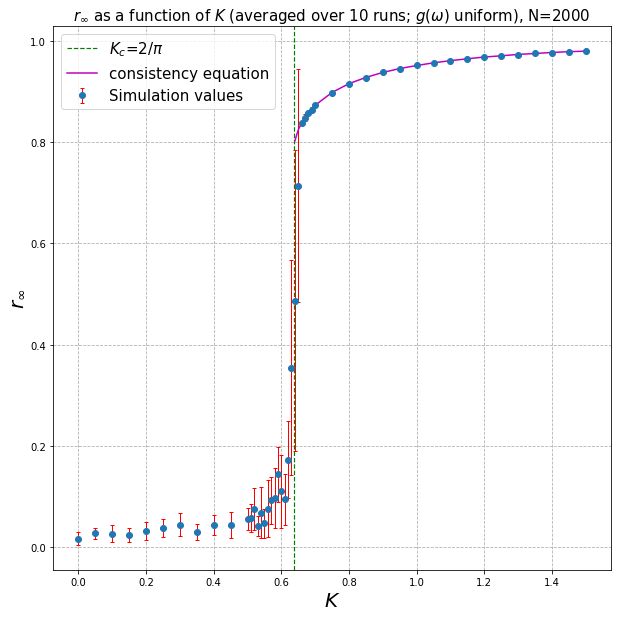

In [7]:
r=[]
for i in range(0,len(K)):
    r.append(bisection(Bu,K[i],0,1,100))
    
plt.figure(figsize=(10,10))
plt.errorbar(K,R[0],R[1], marker="o", elinewidth=1, lw=0, ecolor="red", capsize=2)
plt.axvline(x=2/np.pi, c="green", ls="--", lw=1.2)
plt.plot(K,r,c="m")
plt.grid(ls="--")
plt.title("$r_\infty$ as a function of $K$ (averaged over %d runs; $g(\omega$) uniform), N=%d " %(nruns,N),fontsize=15)
plt.ylabel("$r_\infty$",fontsize=20)
plt.xlabel("$K$",fontsize=20)
plt.legend(("$K_c$=2/$\pi$",'consistency equation','Simulation values'),fontsize=15)
plt.savefig("rvsKunifor_N=%d.png" % N)

In [9]:
np.argmax(R[1])

24

In [12]:
K[24]

0.6400000000000001